# **Project Name**    -         **Coronavirus Tweet Sentiment Analysis**

---



##### **Project Type**    - Classification Project
##### **Contribution**    - Team
##### **Team Member 1 - Siddesh Sakhalkar**

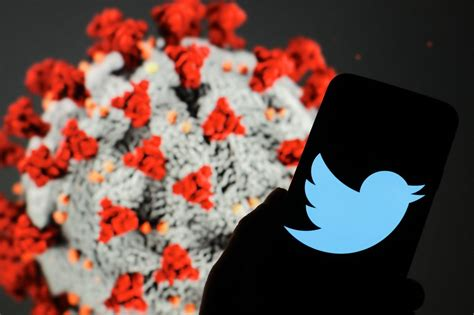

# **Project Summary -**

The COVID-19 pandemic is a global outbreak of the coronavirus, an infectious disease caused by the severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2) virus.

The first cases of the novel coronavirus (nCoV) were first detected in China in December 2019, with the virus quickly spreading to other countries around the world. This led the WHO to declare a public health emergency of international concern on 30 January 2020 and to designate the outbreak as a pandemic on 11 March 2020.

Since the start of the COVID-19 pandemic, more than 2 million people have died from the disease in the European region.

Sentiment analysis of tweets related to the coronavirus can provide valuable insights into public opinion and perception of the virus. It can be used to track changes in sentiment over time, identify influential users and groups, and identify specific issues or concerns related to the virus. However, it is important to note that sentiment analysis is not a straightforward task and results may vary depending on the dataset, pre-processing and modeling used. Sentiment analysis of tweets can be challenging due to informal language, use of slang and emoticons, and the presence of sarcasm and irony.



1. Social media users are increasing with time because they are addicted to
social media for informative content and data volume is also increasing; this
focused on the use of natural language processing (NLP) with various algorithms
Artificial intelligence (AI) for efficient acquisition of meaningful information.

2. NLP and its applications have had a significant impact on social media text analysis and classification; however, problems with determining the inherent importance of content using NLP strategies such as contextual phrases and words, and ambiguity in the text or speech, require the use of ML-based algorithms.

3. In this study, we used data from Twitter for sentiment analysis to identify public sentiment and explore heightened fear associated with the coronavirus. Many traditional approaches have been used for the identification
of human behaviour and nature, which presents the possibility of increasing the analysis by quickly performing sentiment classification using NLP techniques.

4. In this project of Sentiment Analysis, some of the techniques we have used are- Loading Data, Data Wrangling, EDA and data visualisation, Text preprocessing, handling imbalance in the datatset, tfidf vectorisation, train-test split and then we have built multiclass classification model.

# **GitHub Link -**

# **Problem Statement**


**By the means of this project we want to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then. The names and usernames have been given codes to avoid any privacy concerns.**

**We are given the following information:**

**usename**

**screen name**

**Location**

**Tweet At**

**Original Tweet**

**Sentiment**

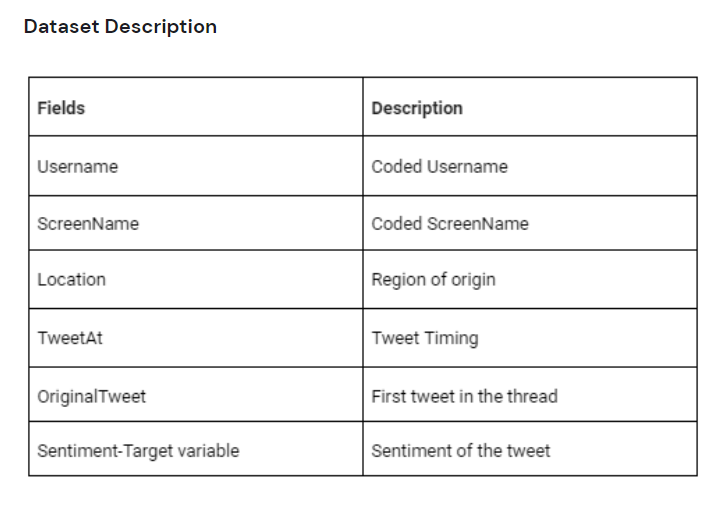

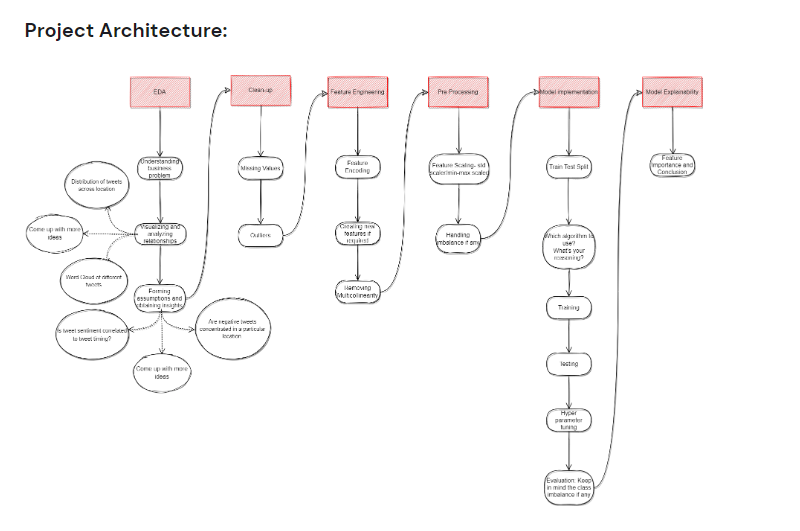

### Things to do-:
1. Performing EDA and to Visualise the dataset with 15 different plots
2. Exploratory Data Analysis
3. Text Preprocessing by nltk
4. Creating the Final Dataframe on which we will build the model with the required columns.
5. To apply TFIDF Vectorisation technique
6. Data Imbalance handling BY SMOTE
7. Splitting the Data into train and test
8. Building Machine Learning Models.
9. Comparing Different ML model's performance.
10. Conclusion

## **Mounting the drive to access the dataset**

In [3]:
from google.colab import files
uploads = files.upload()

Saving Coronavirus Tweets.csv to Coronavirus Tweets.csv


### Import Libraries

In [1]:
#First we are importing all the essential libraries used in our analysis.

## EDA Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from datetime import datetime

##Text Preprocessing Libraries
import nltk
from wordcloud import WordCloud
import string


##Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [4]:
# Load Dataset
data = pd.read_csv('Coronavirus Tweets.csv', encoding= 'ISO-8859-1', low_memory=False)
##Here we have used encoding = 'ISO-8859-1' to deal with the unicode error

### Dataset First View

In [5]:
# Dataset First Look
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


The **head()** function is used to get the first n rows, which is five by default.

### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
data.shape   #There are 41,157 observations and 6 features in our dataset

(41157, 6)

**Shape()**: The shape property returns a tuple containing the shape of the DataFrame.

### Dataset Information

In [7]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


**info():** The info() method prints information about the DataFrame.

#### There are null values in our location column

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
data.duplicated().sum()

0

#### There are no duplicate values in our dataset

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
data.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

<Axes: >

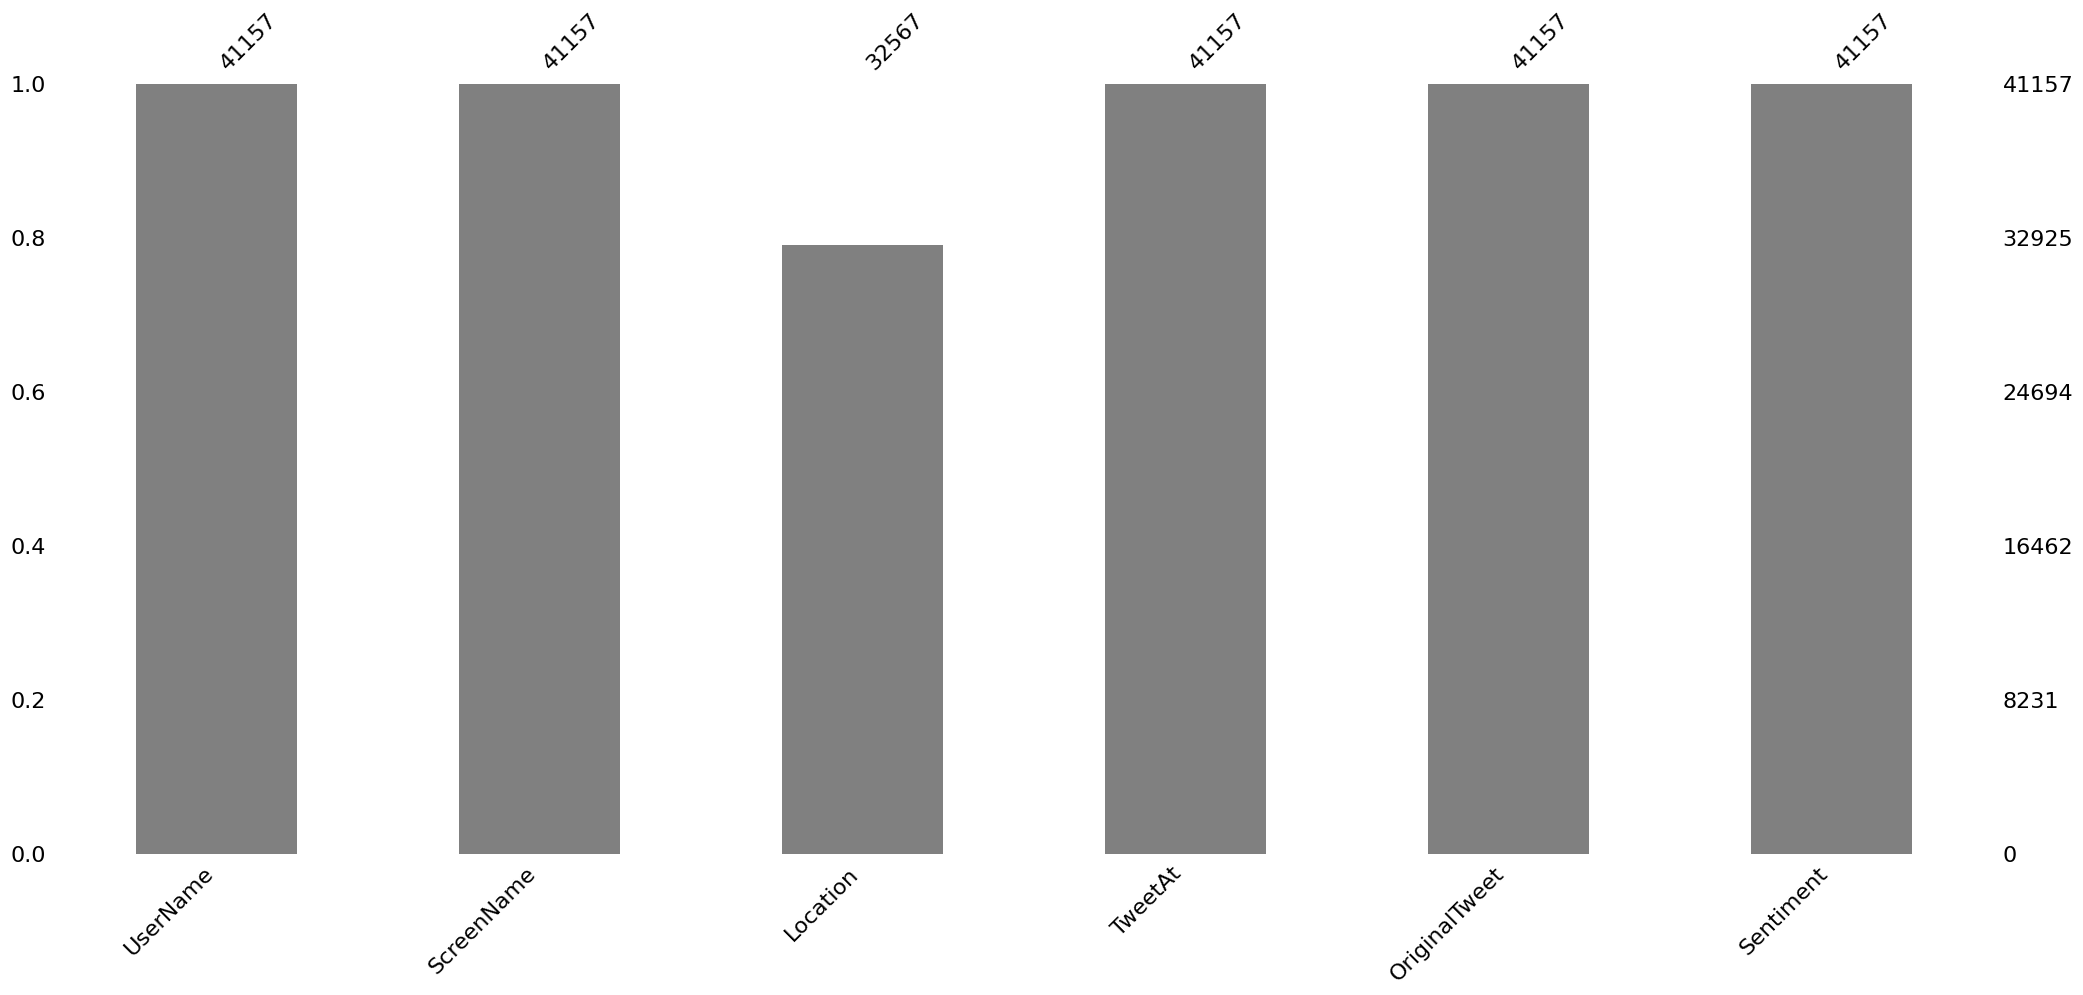

In [10]:
# Visualizing the missing values
msno.bar(data, color='grey')

### Information about the Dataset

#### 1. We can see that there are 41,157 observations and 6 features in our dataset.
#### 2. There are no duplicate values in our dataset.
#### 3. There are many null values in location column in our dataset.
#### 4. This dataset contains the tweets from different users, all tweets are related to COVID19.
#### 5. And Sentiments values are given that describes the sentiment related to a particular tweet, it determines if the tweet is positive, negative, extremely positive, extremely negative or neutral.

## **Understanding the Variables**

In [11]:
# Dataset Columns
data.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [12]:
# Dataset Describe
data.describe(include='all')

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
count,41157.000000,41157.000000,32567,41157,41157,41157
unique,NaN,NaN,12220,30,41157,5
top,NaN,NaN,London,20-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Positive
freq,NaN,NaN,540,3448,1,11422
mean,24377.000000,69329.000000,NaN,NaN,NaN,NaN
std,11881.146851,11881.146851,NaN,NaN,NaN,NaN
min,3799.000000,48751.000000,NaN,NaN,NaN,NaN
25%,14088.000000,59040.000000,NaN,NaN,NaN,NaN
50%,24377.000000,69329.000000,NaN,NaN,NaN,NaN
75%,34666.000000,79618.000000,NaN,NaN,NaN,NaN


### Variables Description

#### 1. There are total 6 variables in our dataset.
#### 2. One of the most important features are OriginalTweet and Sentiment.
#### 3. We have quite a good number of null values in the feature Location.
#### 4. There are 2 numerical features in our dataset, which are UserName and ScreenName.
#### 5. Also we have a column named 'TweetAt' that specify the date when the tweet was posted by the user.

### Check Unique Values for each variable.

In [13]:
data['Location'].unique()

array(['London', 'UK', 'Vagabonds', ..., 'Juba south sudan', 'OHIO',
       'i love you so much || he/him'], dtype=object)

**unique ()** function is a function that returns the unique values from the given lists or array of values.

In [14]:
# A for loop is used for iterating over a sequence (that is either a list, a tuple, a dictionary, a set, or a string).
data_columns_list = data.columns.to_list()
for i in data_columns_list:
  print('\033[1m'+'\n\nThe Unique Values in'+'\033[0m','\033[1m'+ i+'\033[0m', 'are:', data[i].unique())



The Unique Values in UserName are: [ 3799  3800  3801 ... 44953 44954 44955]


The Unique Values in ScreenName are: [48751 48752 48753 ... 89905 89906 89907]


The Unique Values in Location are: ['London' 'UK' 'Vagabonds' ... 'Juba south sudan' 'OHIO'
 'i love you so much || he/him']


The Unique Values in TweetAt are: ['16-03-2020' '17-03-2020' '18-03-2020' '19-03-2020' '20-03-2020'
 '21-03-2020' '22-03-2020' '23-03-2020' '24-03-2020' '25-03-2020'
 '26-03-2020' '27-03-2020' '28-03-2020' '29-03-2020' '30-03-2020'
 '31-03-2020' '01-04-2020' '02-04-2020' '03-04-2020' '04-04-2020'
 '05-04-2020' '06-04-2020' '07-04-2020' '08-04-2020' '09-04-2020'
 '10-04-2020' '11-04-2020' '12-04-2020' '13-04-2020' '14-04-2020']


The Unique Values in OriginalTweet are: ['@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8'
 'advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours scho

## **Data Wrangling**

In [15]:
# Our dataset contains Text data so its better to convert it into string as its textual content.
data['OriginalTweet']=data['OriginalTweet'].astype(str)
data['Sentiment']=data['Sentiment'].astype(str)


In [16]:
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


**NLTK (Natural Language Toolkit)** :is the go-to API for NLP (Natural Language Processing) with Python. It is used to preprocess text data for further analysis like with ML models for instance. It helps convert text into numbers, which the model can then easily work with.


In [17]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [18]:
## Creating new columns that represents the count of characters, words and sentences in a tweet
data['num_char']= data['OriginalTweet'].apply(len)
data['num_words'] = data['OriginalTweet'].apply(lambda x:len(nltk.word_tokenize(x)))
data['num_sentences'] = data['OriginalTweet'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [19]:
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,num_char,num_words,num_sentences
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111,17,1
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,237,38,1
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,131,18,1
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,306,58,4
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,310,58,4


In [20]:
## Checking out highest number of tweets posted by which location
data.Location.value_counts().head()

London             540
United States      528
London, England    520
New York, NY       395
Washington, DC     373
Name: Location, dtype: int64

In [21]:
data.shape

(41157, 9)

In [22]:
data['UserName'].nunique()

41157

### What all manipulations have you done and insights you found?

#### 1. At first we converted our text data into string format.
#### 2. Then, we Created new columns that represents the count of characters, words and sentences in a tweet, which will further help us in analysing the data through visuals.
#### 3. After that, we calculated Which location has the highest number of tweets.

##  **Data Visualisation & Exploratory Data Analysis(EDA)**

#### Total percent of Sentiment count with respect to their Tweets.

<Axes: ylabel='OriginalTweet'>

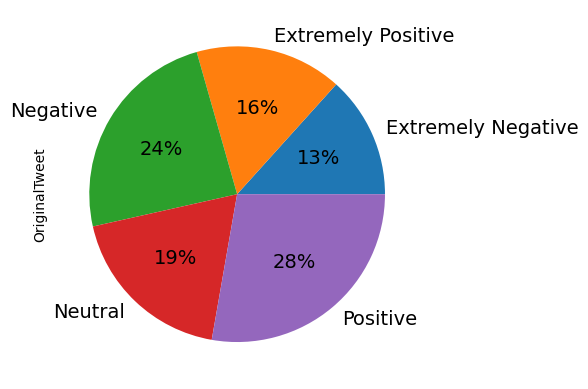

In [23]:
#Pie plot
data.groupby('Sentiment')['OriginalTweet'].count().plot(kind = 'pie', autopct='%.0f%%', textprops={'fontsize': 14})

##### 1. Why did you pick the specific chart?

##### 1. We picked this pie chart to plot the relationship between Sentiment and OriginalTweet

##### 2. Pie charts are useful to represent data that is categorical.

##### 2. What is/are the insight(s) found from the chart?

##### **As we can see from the above visual that 28% tweets are positive, 16% are extremely positive, 37% are negative, 13% are extremely negative and 19% tweets are neutral. There are good number of positive tweets that shows positive mindset of people during the pandemic.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

##### **As the sentiment of many tweets are positive so business can look forward to run ads related to more positive content, so that the click-through rates will increase and also the revenue.**

#### Number of character counts present in the tweet and their sentiments.


Text(0.5, 1.0, 'Number of Sentences and Sentiment Relation')

<Figure size 1000x500 with 0 Axes>

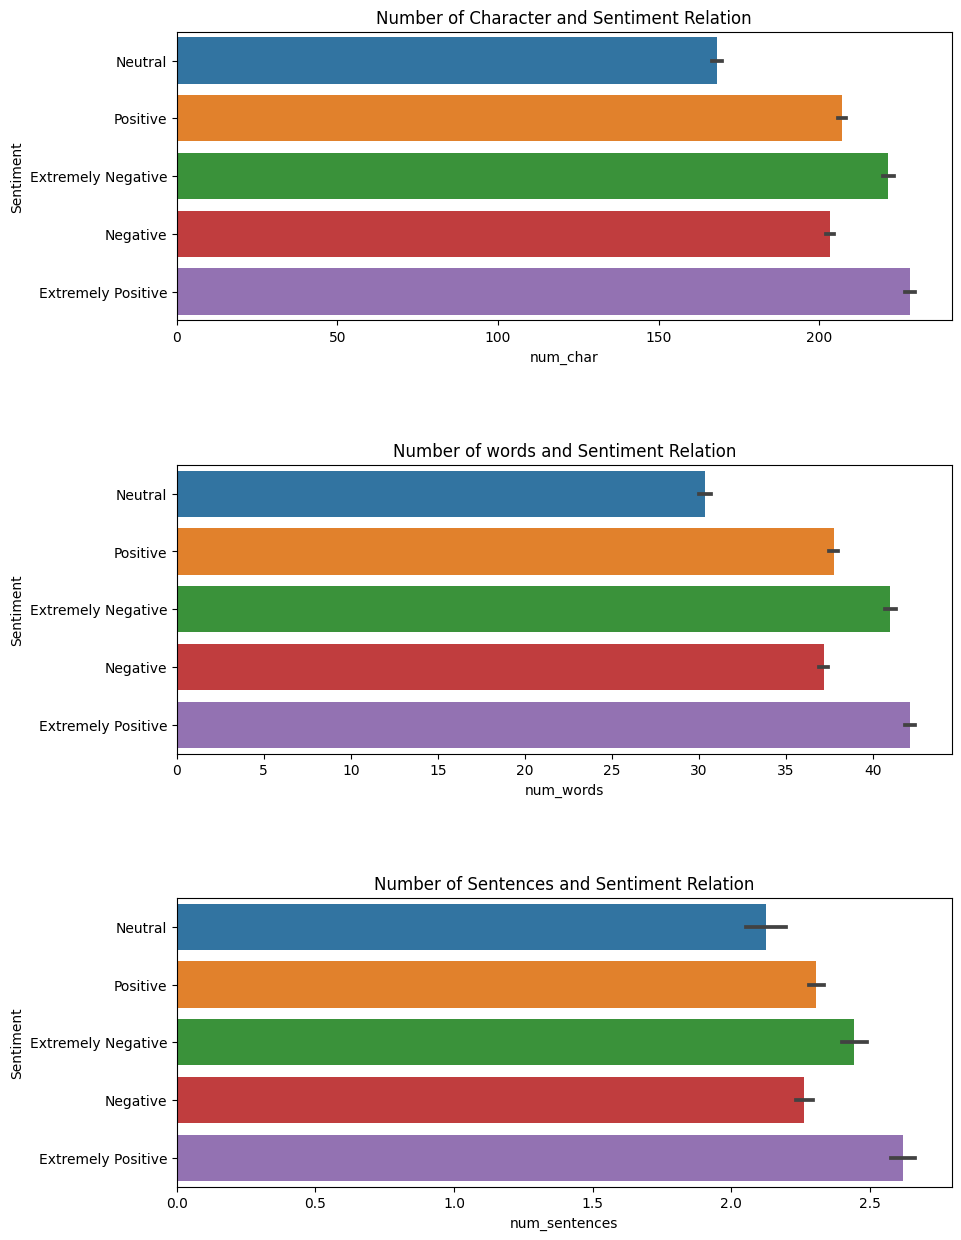

In [24]:
plt.figure(figsize=(10,5))
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,15))
ax = axes.flatten()
sns.barplot(data=data, x='num_char', y='Sentiment', ax=ax[0])
plt.subplots_adjust(hspace=0.5, wspace=0.2)
sns.barplot(data=data, x='num_words', y='Sentiment', ax=ax[1])
sns.barplot(data=data, x='num_sentences', y='Sentiment', ax=ax[2])
ax[0].set_title('Number of Character and Sentiment Relation')
ax[1].set_title('Number of words and Sentiment Relation')
ax[2].set_title('Number of Sentences and Sentiment Relation')

##### 1. Why did you pick the specific chart?

##### 1. We Picked this specific chart to plot the relation between character count of tweets and sentiments, word count of tweets and sentiment, and sentence count of tweets and sentiment.
##### 2. We used this specific chart because bar plot is a graph that represents the distribution of a categorical or discrete dataset.

##### 2. What is/are the insight(s) found from the chart?

It can be seen that number of words, number of sentences and number of characters has no such drastic effects on sentiment.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It can be seen that number of words, number of sentences and number of characters has no such drastic effects on sentiment, so there will be no impact upon the business because of this.

#### Average length of Tweets made by the users.

<Axes: ylabel='Frequency'>

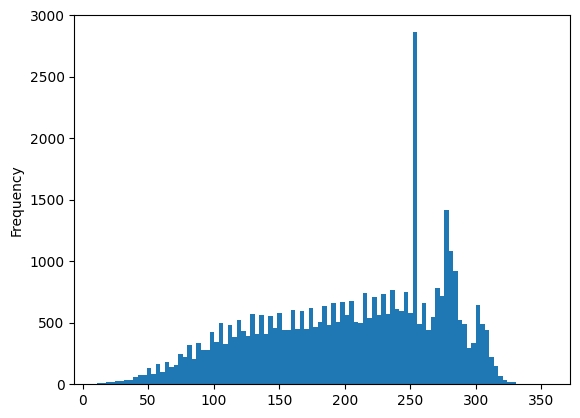

In [25]:
data['num_char'].plot(bins=100, kind='hist')

In [26]:
data['num_char'].describe()

count    41157.000000
mean       204.200160
std         68.655129
min         11.000000
25%        151.000000
50%        215.000000
75%        259.000000
max        355.000000
Name: num_char, dtype: float64

In [27]:
data[data['num_char'] == 11]

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,num_char,num_words,num_sentences
9776,13575,58527,"Scotland, United Kingdom",20-03-2020,Be like Bob,Positive,11,3,1
16872,20671,65623,?? ?,23-03-2020,Cartoon for,Neutral,11,2,1
20467,24266,69218,Coastal Elite ?,25-03-2020,Omg y all,Neutral,11,3,1
35526,39325,84277,"Indore, India",09-04-2020,amp,Neutral,11,1,1


In [28]:
data[data['num_char'] == 355]

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,num_char,num_words,num_sentences
25160,28959,73911,"Melbourne, Australia",30-03-2020,Crude oil dropped to its lowest in 17 years in...,Extremely Negative,355,57,2


In [29]:
data[data['num_char'] == 355]['OriginalTweet'].iloc[0]

'Crude oil dropped to its lowest in 17 years in Asia as #coronavirus in #US and #EU shows little sign of slowing.\r\r\n\r\r\nNoon prices:\r\r\n#SPX500Â\x962504.3\r\r\n#NAS100Â\x967507.1\r\r\n#WTIÂ\x9620.24\r\r\n#GOLDÂ\x961618.08\r\r\n#SILVERÂ\x9614.118\r\r\n\r\r\nWatch these prices closely: https://t.co/WuiEEfSNOj\r\r\n\r\r\n#COVID19 #CoronaVirusOutbreak https://t.co/j68MZIDXAd https://t.co/9MyqGxutUU'

In [30]:
data[data['num_char'] == 280]

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,num_char,num_words,num_sentences
8,3807,48759,"Atlanta, GA USA",16-03-2020,Due to COVID-19 our retail store and classroom...,Positive,280,52,4
27,3826,48778,Everywhere You Are!,16-03-2020,This morning I tested positive for Covid 19. I...,Extremely Negative,280,61,7
53,3852,48804,NaN,16-03-2020,"Dear Coronavirus, \r\r\nI've been following so...",Positive,280,52,5
374,4173,49125,East Central Alberta,16-03-2020,#NewZealand beef exports to U.S. and Canada ar...,Extremely Positive,280,53,5
408,4207,49159,"Wayne, NJ",16-03-2020,Anyone who suspects price gouging and other CO...,Extremely Negative,280,48,2
...,...,...,...,...,...,...,...,...,...
40999,44798,89750,United States,14-04-2020,Company Withdraws Fiscal 2020 Financial Guidan...,Positive,280,59,1
41018,44817,89769,https://ivotoniut.blogspot.com,14-04-2020,In #Italy the composition has always been indi...,Negative,280,60,4
41027,44826,89778,"Toronto, ONT, Canada",14-04-2020,this deck by .@lukew in insanely good - great ...,Extremely Positive,280,52,8
41032,44831,89783,Connecticut,14-04-2020,"Thank you to all our health care workers , doc...",Extremely Positive,280,53,3


##### 1. Why did you pick the specific chart?

We used this specific chart to check plot the histogram for our length of the tweets, and to check the average, maximum and minimum length of tweets in the dataset

##### 2. What is/are the insight(s) found from the chart?



*   The length of the shortest tweet is 11
*   The length of the longest tweet is 355, and it is from Melbourne, Australia. The Sentiment of this tweet is negative
*   The average length of tweets that is number of characters lies between 250-300.





##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These length of tweets can help the business in spam classification also

#### Tweet and sentiment relation.

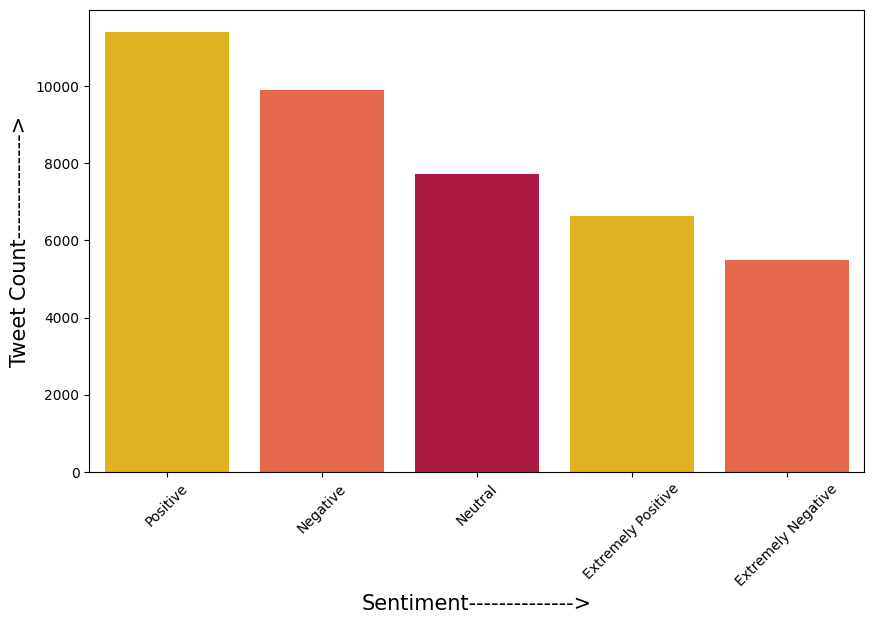

In [31]:
# ploting countplot for "Sentiment" column
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=data, order=data['Sentiment'].value_counts().index, palette=['#FFC300', '#FF5733', '#C70039'])
plt.xlabel("Sentiment-------------->", fontsize=15)
plt.ylabel("Tweet Count-------------->", fontsize=15)
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

* To Plot the countplot between difeerent classes in Setiment column.
* To check out the number of Tweets and sentiment relation.

##### 2. What is/are the insight(s) found from the chart?

* We have 10k+ Tweets of Positive Sentiment.
* We have 9k+ tweets of Negative Sentiment.
* We have 7k+ Tweets of Neutral Sentiment.
* The number of Extremely positive and Negative tweets are on the lower side but still there are good number of such tweets.
* Tweets with positve sentiments are the highest in number.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As there are more number of positive tweets, negative tweets are not less in number. So, company may try to run some social campaign that is based on spreading the positivity throughout the community, which will benefit the company as it'll increase the loyalty and trust of users in the company.

#### Frequency of popularily used hashtag word such as "coronavirus","COVID2019","covid19" etc.. in our OriginalTweet Column.

In [32]:
# Barplot for hashtags

import re
def find_hash(OriginalTweet):
    line=re.findall(r'(?<=#)\w+',OriginalTweet)
    return " ".join(line)
data['hash']=data['OriginalTweet'].apply(lambda x:find_hash(x))
temp=data['hash'].value_counts()[:][1:6]
temp= temp.to_frame().reset_index().rename(columns={'index':'Hashtag','hash':'count'})
temp

## The above function find_ash use the regular expression module i.e. re. The function uses the re (regular expression) module to search for hashtags in the input string. The findall function of the re module is used to find all the hashtags in the string. The findall function takes a regular expression pattern as an argument and returns a list of all the matches.
## The regular expression pattern r'(?<=#)\w+' is used to match hashtags. The \w+ part of the pattern matches one or more alphanumeric characters (a-z, A-Z, 0-9). The (?<=#) part of the pattern specifies that the match should be preceded by a "#" symbol. This ensures that only words that start with "#" are matched as hashtags.

## Finally, the join function is used to join the list of hashtags into a single string, with a space character between each hashtag. This resulting string is returned by the function.

,Hashtag,count
0,coronavirus,2670
1,Covid_19,652
2,Coronavirus,541
3,COVID2019,415
4,coronavirus COVID19,215


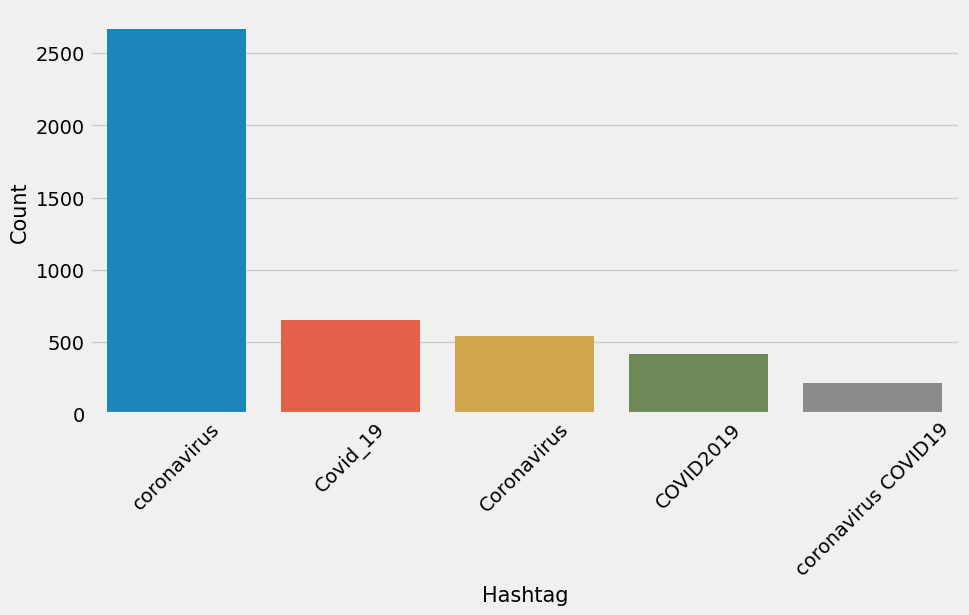

In [33]:
plt.style.use("fivethirtyeight")

fig = plt.figure(figsize=(10, 5))
sns.barplot(x=temp["Hashtag"], y=temp["count"])
plt.xlabel("Hashtag", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

We have used this plot to plot the graph for different hashtags used in tweets and to check their frequency.

##### 2. What is/are the insight(s) found from the chart?

* coronavirus Hashtag is the most used hashtag in the tweets that are given in our dataset.
* It has been used 2670 times by different users in their tweets.
* Other popular hashtags are Covid_19 with frequency 652, Coronavirus with frequency 541, COVID2019 with frequency 415, and the last one that is coronavirus COVID19 with frequency 215

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The company can use this insight to keep a check on what's trending and why is it in the trend, so that it could help in posting targeted ads and relatable campaigns throughout the platform.

#### Mostly tagged people across the community.

In [34]:
import re
def find_hash(OriginalTweet):
    line=re.findall(r'(?<=@)\w+',OriginalTweet)
    return " ".join(line)
data['tags']=data['OriginalTweet'].apply(lambda x:find_hash(x))
temp=data['tags'].value_counts()[:][1:11]
temp= temp.to_frame().reset_index().rename(columns={'index':'Tag','tags':'count'})
temp

,Tag,count
0,realDonaldTrump,125
1,YouTube,74
2,BorisJohnson,62
3,Tesco,61
4,amazon,59
5,FTC,45
6,sainsburys,41
7,McKinsey,33
8,piersmorgan,33
9,narendramodi,31


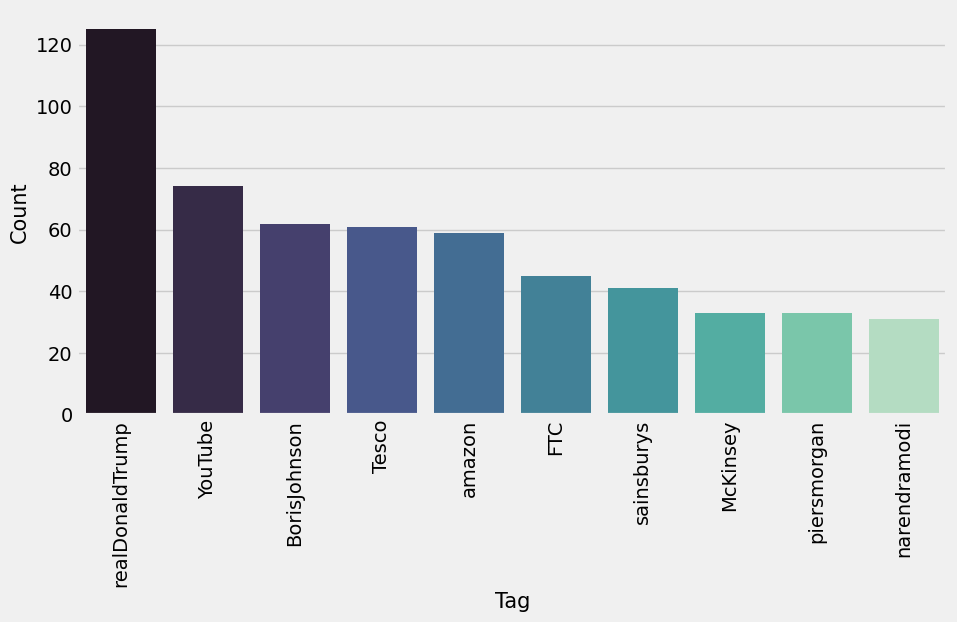

In [35]:
plt.style.use("fivethirtyeight")  # Applying the "fivethirtyeight" style

fig = plt.figure(figsize=(10, 5))
sns.barplot(x="Tag", y="count", data=temp, palette="mako")
plt.xlabel("Tag", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(rotation=90)  # to Rotate x-axis labels
plt.show()

##### 1. Why did you pick the specific chart?

Here we have used barplot to check the plot of different tags used by people in their tweets, which accounts were mostly tagged by people across the community.

##### 2. What is/are the insight(s) found from the chart?

realDonaldTrump is the tag that's been mostly used by people across the world. DonalTrump was president of America at that time, and that's why people had tagged him the most in order to tell the severity of situations in different areas.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From this company can find out the most famous and trending celebrities on their platform.

#### Location with respect to tweet count.

In [36]:
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,num_char,num_words,num_sentences,hash,tags
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111,17,1,,MeNyrbie Phil_Gahan Chrisitv
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,237,38,1,,
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,131,18,1,,
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,306,58,4,COVID19france COVID_19 COVID19 coronavirus con...,
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,310,58,4,COVID19 coronavirus CoronavirusFrance restezch...,


In [37]:
# We are filling the misssing values with a blank space, as we can't drop the column because it has 17k+ values
data['Location'].fillna('', inplace = True)

In [38]:
x = data.copy()

In [39]:
x.rename(columns = {'Sentiment':'Tweet Count'}, inplace = True)

In [40]:
lst1 = []

In [41]:
x['Location'].value_counts()

                                 8590
London                            540
United States                     528
London, England                   520
New York, NY                      395
                                 ... 
Views don't reflect employers       1
Charlotte, MI                       1
East Midlands, UK                   1
Mid Yell, Scotland                  1
i love you so much || he/him        1
Name: Location, Length: 12221, dtype: int64

In [42]:
location_counts = x['Location'].value_counts()

# Storing the index (unique locations) into a list
index_list = location_counts.index.tolist()

# Print the index list
print(index_list)

['', 'London', 'United States', 'London, England', 'New York, NY', 'Washington, DC', 'United Kingdom', 'Los Angeles, CA', 'India', 'UK', 'Australia', 'USA', 'Canada', 'England, United Kingdom', 'Toronto, Ontario', 'Global', 'Chicago, IL', 'California, USA', 'San Francisco, CA', 'Boston, MA', 'New York, USA', 'New Delhi, India', 'Atlanta, GA', 'New York', 'Mumbai, India', 'Worldwide', 'Lagos, Nigeria', 'Houston, TX', 'Austin, TX', 'Texas, USA', 'London, UK', 'Toronto', 'Los Angeles', 'Nairobi, Kenya', 'New York City', 'Singapore', 'Florida, USA', 'Philadelphia, PA', 'South Africa', 'Nigeria', 'Washington, D.C.', 'Sydney, New South Wales', 'Seattle, WA', 'Mumbai', 'Earth', 'New Zealand', 'San Diego, CA', 'Melbourne, Victoria', 'Dallas, TX', 'Sydney, Australia', 'Las Vegas, NV', 'Ireland', 'Denver, CO', 'Chicago', 'NYC', 'New Jersey, USA', 'Brooklyn, NY', 'Melbourne, Australia', 'Ontario, Canada', 'England', 'California', 'Manchester, England', 'Scotland, United Kingdom', 'Johannesburg, S

In [43]:
world_plot = x.groupby(['Location'], as_index=False).count()

In [44]:
import plotly.express as px

In [45]:
fig = px.choropleth(world_plot, locations='Location', locationmode='country names',
                    color='Tweet Count', hover_name= 'Location', projection='orthographic')

In [46]:
fig.show()

In [47]:
data['Location'].nunique()

12221

In [48]:
data.shape

(41157, 11)

In [49]:
data[data['Location'] == 'Kinshasa']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,num_char,num_words,num_sentences,hash,tags
20381,24180,69132,Kinshasa,25-03-2020,She does not have a face mask to wear amp has ...,Extremely Positive,217,44,1,,


In [50]:
data[data['Location'] == 'Alberton, South Africa']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,num_char,num_words,num_sentences,hash,tags
40360,44159,89111,"Alberton, South Africa",13-04-2020,@HeidiGiokos @flysaa So disturbing that SA is ...,Positive,255,45,3,,HeidiGiokos flysaa


In [51]:
data[data['Location'] == 'Namibia']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,num_char,num_words,num_sentences,hash,tags
21105,24904,69856,Namibia,25-03-2020,Providers of healthcare and hygiene products i...,Negative,227,34,1,,
21301,25100,70052,Namibia,25-03-2020,Mara this fools keep on suprising me. They wan...,Negative,238,45,4,,
24635,28434,73386,Namibia,27-03-2020,Even during DStv is just increasing their pric...,Negative,64,10,1,,
29979,33778,78730,Namibia,06-04-2020,Food Security The current demand is high even ...,Positive,260,43,1,,
29980,33779,78731,Namibia,06-04-2020,Our priority Number 1: is Airport or Food Secu...,Extremely Positive,72,14,2,,


##### 1. Why did you pick the specific chart?

* We used this chart to plot the relation between number of tweets and the location of the users who posted those tweets
* We have applied groupby on location to get the specific data to plot this chloropeth map.


##### 2. What is/are the insight(s) found from the chart?

Our number of tweets data is quite distributed across different locations, like In kinshasha and Alberton there are only 1 number of tweets while there are 5 tweets posted from Namibia

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The company may learn which are the most active locations from where tweets are being posted by using this graphic and its insights. And can go on to develop more focused revenue-generating marketing strategies.

#### Visual representation of TweetAt Column

Text(0.5, 1.0, 'Count Plot of Tweet Date')

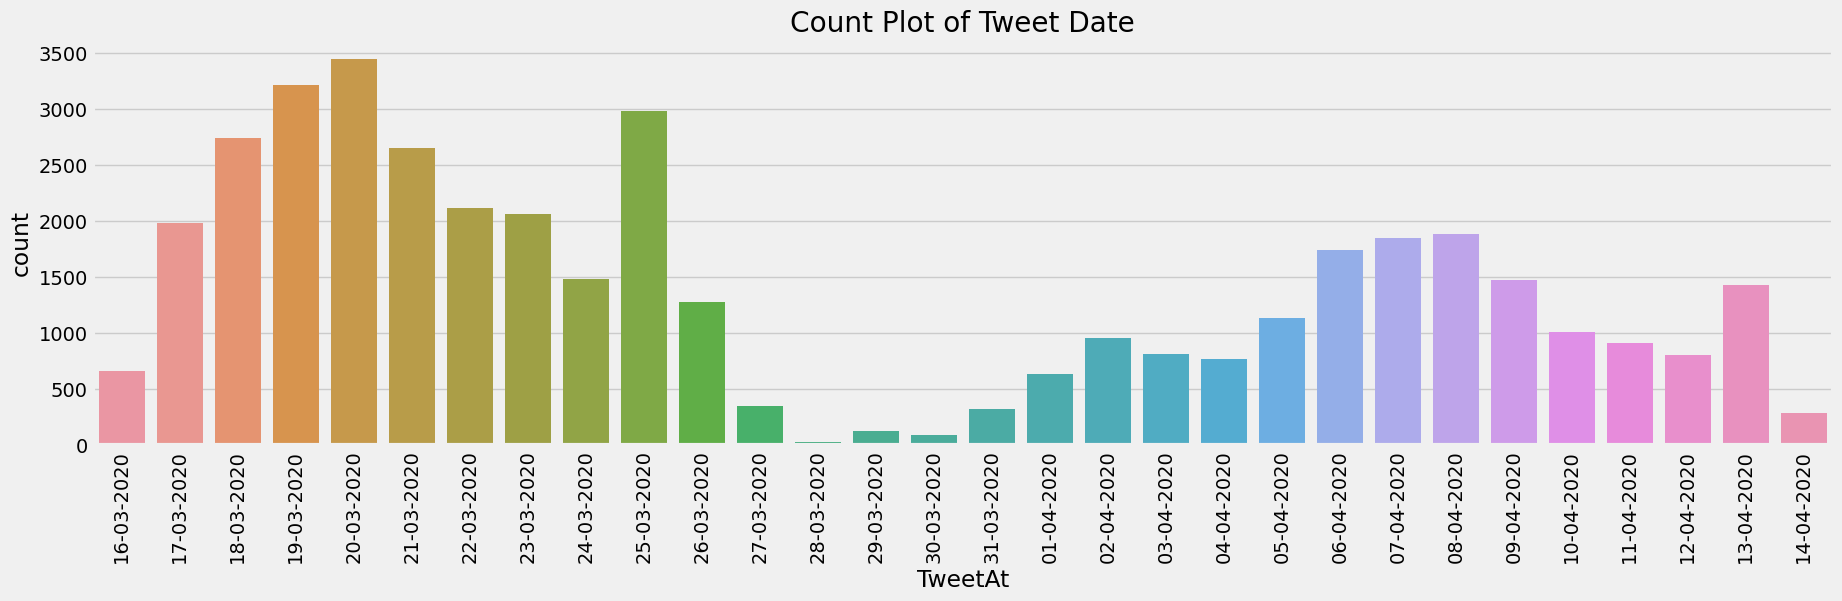

In [52]:
plt.figure(figsize=(20,5))
sns.countplot(x=data["TweetAt"])
plt.xticks(rotation=90)
plt.title('Count Plot of Tweet Date')

As we can see that In March Covid-19 was at peak, So there is also peak in the tweets posted by the users. Most number of tweets were between 17th March 2020 to 25th March 2020.

#### Summarization of information present in our given dataset.

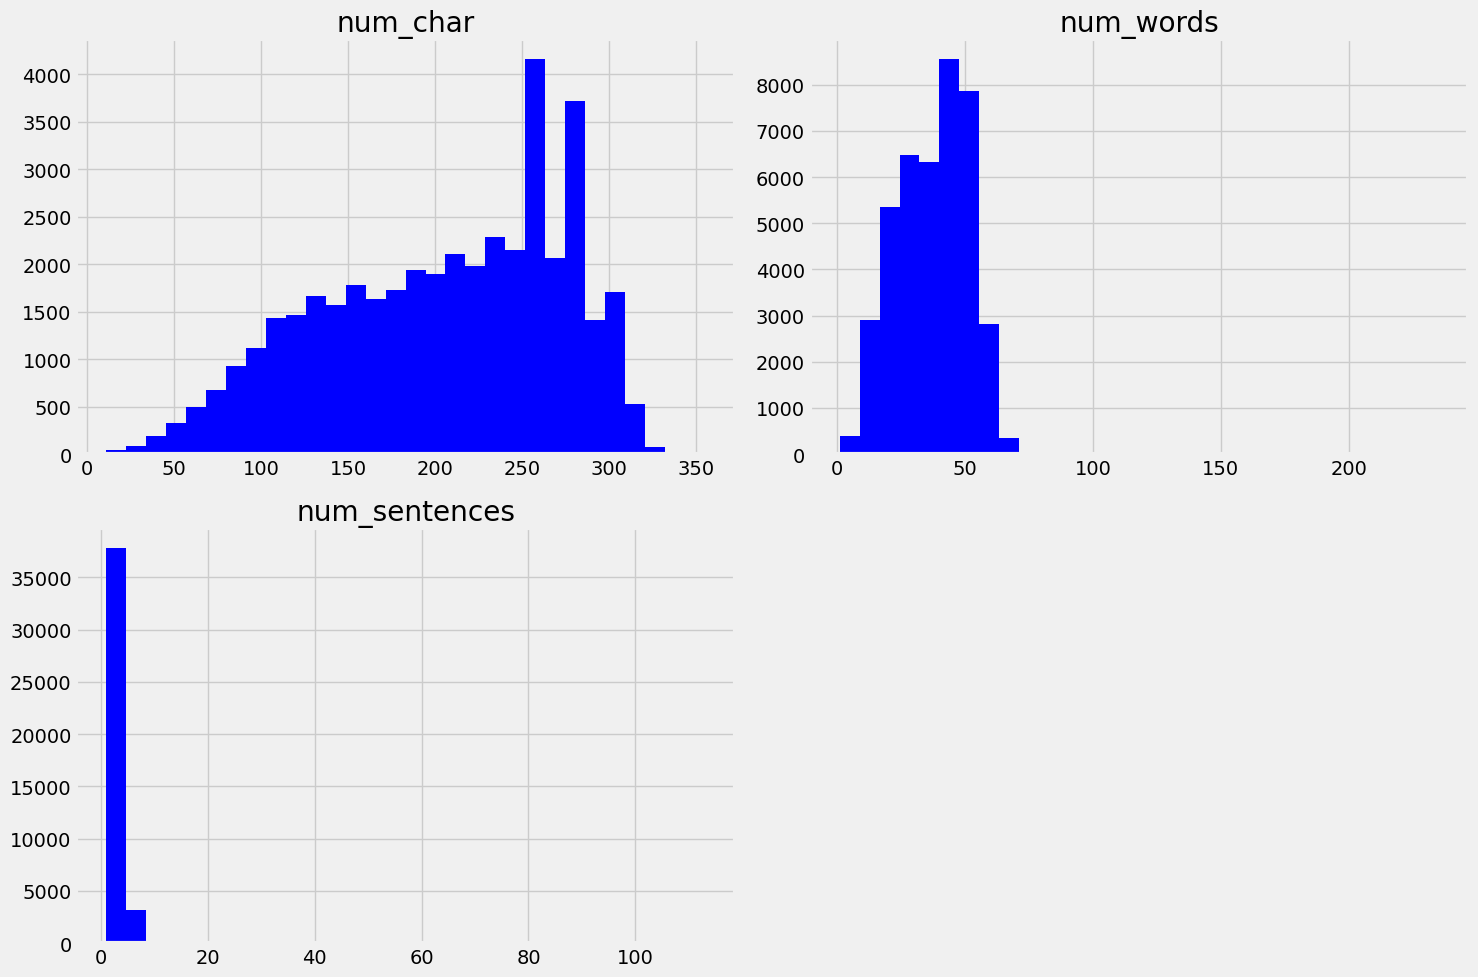

In [53]:
plt.style.use('fivethirtyeight')  # Applying the 'fivethirtyeight' style
data[['num_char', 'num_words', 'num_sentences']].hist(bins=30, figsize=(15, 10), color="b")

plt.title('Histogram of Character Count, Word Count, and Sentence Count')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.tight_layout()

plt.show()

##### 1. Why did you pick the specific chart?

It is used to summarize data that are measured on an interval scale. It is often used to illustrate the major features of the distribution of the data in a convenient form.

##### 2. What is/are the insight(s) found from the chart?

In the first given data we can see that to every row the user name and screen name are unique so the data is distributed uniformly, and in the TweetAt column we can see the the tweets are high during the 3rd month(March) and 5th(May) month as the first wave of pandemic was spread from the month of March 2020 and there was chaos. Likewise we may see that number of words that are tweeted maximumly between 200-300 with minimum sentences and the words below 50

##### 3. Will the gained insights help creating a positive business impact?


Yes, it shows Twitter can play a vital role in disseminating time-critical information about the latest case rates and research results—and can do so faster than traditional news media, so it helps the business to give importance to the lastest information and speard the news faster than any media.

#### Correlation Heatmap

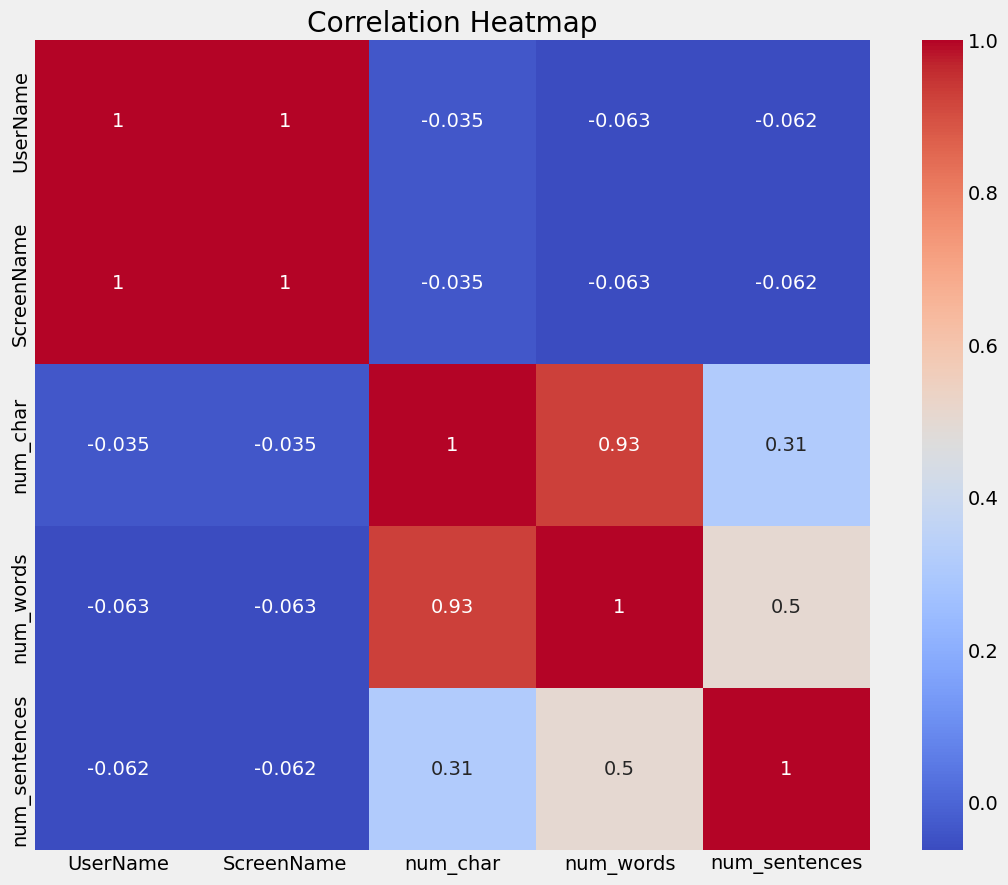

In [54]:
# Correlation Heatmap visualization code
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')  # Using 'coolwarm' colormap
plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

We used heat maps as **Heat Maps** are graphical representations of data that utilize color-coded systems. The primary purpose of Heat Maps is to better visualize the volume of locations/events within a dataset and assist in directing viewers towards areas on data visualizations that matter most.

##### 2. What is/are the insight(s) found from the chart?

This is the problem statement where we are majorly dealing with textual data, so there is less need for Correlation Heatmap. Although there are some numerical columns in our dataset like UserName, ScreenName, num_char, num_words, num_sentences. Here in the above visual the correlation between these numerical columns can be seen.

Since we made extra columns from our originaltweet column, there exists highly positive correlation between them.

#### Ploting a graph for number of tweets on location basis

In [55]:
location = pd.DataFrame(data.groupby(['Location'])['OriginalTweet'].count().reset_index().sort_values(by = 'OriginalTweet' , ascending = False))

In [56]:
location.head()

,Location,OriginalTweet
0,,8590
5691,London,540
10456,United States,528
5766,"London, England",520
7092,"New York, NY",395


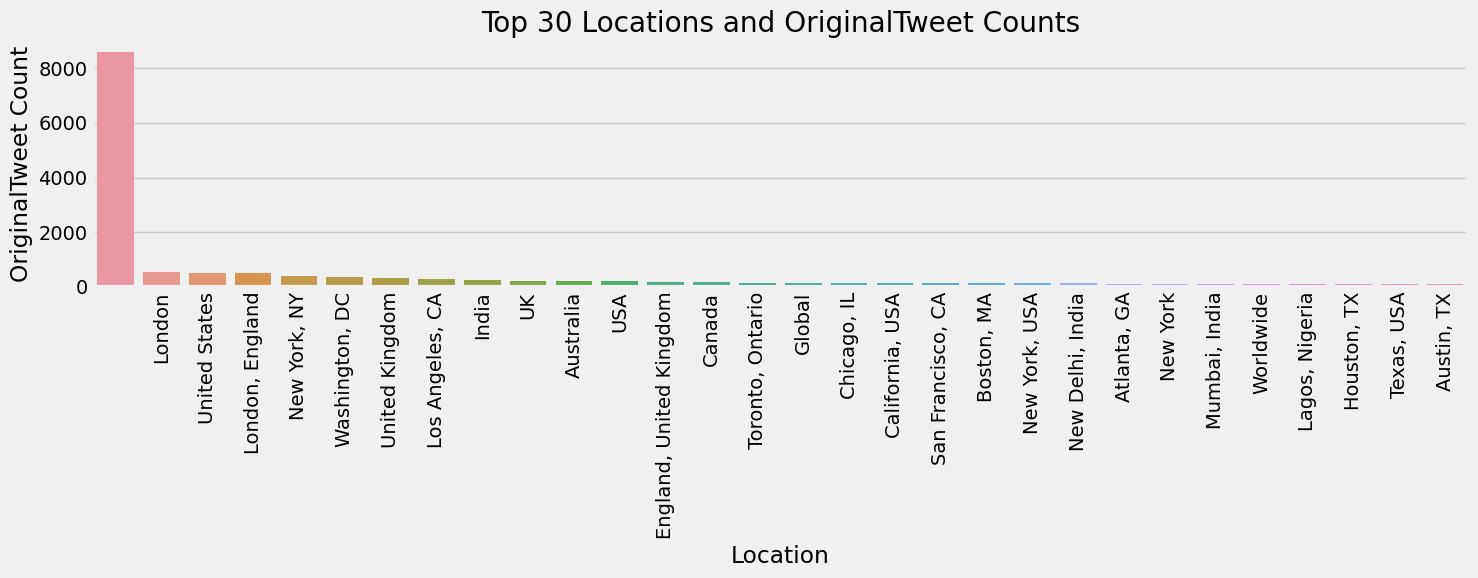

In [57]:
plt.style.use('fivethirtyeight')
sns.set_palette('summer')

plt.figure(figsize=(15, 6))
sns.barplot(data=location.iloc[:30], x='Location', y='OriginalTweet')
plt.xticks(rotation=90)

plt.title('Top 30 Locations and OriginalTweet Counts')
plt.xlabel('Location')
plt.ylabel('OriginalTweet Count')
plt.tight_layout()

plt.show()

## Feature Engineering & Data Pre-processing

### Handling Missing Values

In [58]:
# Handling Missing Values & Missing Value Imputation
data.isnull().sum()

UserName         0
ScreenName       0
Location         0
TweetAt          0
OriginalTweet    0
Sentiment        0
num_char         0
num_words        0
num_sentences    0
hash             0
tags             0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

We only had null values in our location column, which are replaced with empty string in order to create some visualisation.

### Textual Data Preprocessing


#### Expand Contraction

In natural language processing (NLP), contractions are shortened forms of words or phrases that are commonly used in spoken English. Examples of contractions include "don't" (short for "do not"), "can't" (short for "cannot"), and "I'll" (short for "I will" or "I shall"). These contractions are often used in informal text, such as text messages, social media posts, and speech.

In Python, there are several libraries available for working with contractions, such as contractions. contractions is a Python library for working with English contractions. It provides a simple, easy-to-use interface for expanding and contracting words and phrases in text.


In [59]:
# Expand Contraction
!pip install contractions
import contractions

def expand_contractions(text_column):
    expanded_text = [contractions.fix(text) for text in text_column]
    return expanded_text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 8.2 MB/s eta 0:00:00


In [60]:
data['originaltweet'] = expand_contractions(data['OriginalTweet'])

In [61]:
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,num_char,num_words,num_sentences,hash,tags,originaltweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111,17,1,,MeNyrbie Phil_Gahan Chrisitv,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,237,38,1,,,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,131,18,1,,,Coronavirus Australia: Woolworths to give elde...
3,3802,48754,,16-03-2020,My food stock is not the only one which is emp...,Positive,306,58,4,COVID19france COVID_19 COVID19 coronavirus con...,,My food stock is not the only one which is emp...
4,3803,48755,,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,310,58,4,COVID19 coronavirus CoronavirusFrance restezch...,,"Me, ready to go at supermarket during the #COV..."


In [62]:
data['originaltweet'].iloc[3]

'My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, do not panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j'

#### Lower Casing

In [63]:
# Lower Casing
data["originaltweet"] = data["originaltweet"].str.lower()
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,num_char,num_words,num_sentences,hash,tags,originaltweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111,17,1,,MeNyrbie Phil_Gahan Chrisitv,@menyrbie @phil_gahan @chrisitv https://t.co/i...
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,237,38,1,,,advice talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,131,18,1,,,coronavirus australia: woolworths to give elde...
3,3802,48754,,16-03-2020,My food stock is not the only one which is emp...,Positive,306,58,4,COVID19france COVID_19 COVID19 coronavirus con...,,my food stock is not the only one which is emp...
4,3803,48755,,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,310,58,4,COVID19 coronavirus CoronavirusFrance restezch...,,"me, ready to go at supermarket during the #cov..."


#### Removing Punctuations, URL and html tags

In [64]:
# write function for removing @user
import re
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt

# create new column with removed @user
data['originaltweet'] = np.vectorize(remove_pattern)(data['originaltweet'], '@[\w]*')

#Here we are removing the @users from our tweet column as its not important for our analysis.

In [65]:
data['originaltweet'].iloc[0]

'   https://t.co/ifz9fan2pa and https://t.co/xx6ghgfzcc and https://t.co/i2nlzdxno8'

In [66]:
#Removing URL and HTML tags
def remove_url(text):
  pattern =re.compile('(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*')
  return pattern.sub(r'',text)

data['originaltweet']=data['originaltweet'].apply(remove_url)
data.head(3)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,num_char,num_words,num_sentences,hash,tags,originaltweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111,17,1,,MeNyrbie Phil_Gahan Chrisitv,and and
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,237,38,1,,,advice talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,131,18,1,,,coronavirus australia: woolworths to give elde...


In [67]:
# Remove Punctuations


PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

data["originaltweet"] = data["originaltweet"].apply(lambda x: remove_punctuation(x))
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,num_char,num_words,num_sentences,hash,tags,originaltweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111,17,1,,MeNyrbie Phil_Gahan Chrisitv,and and
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,237,38,1,,,advice talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,131,18,1,,,coronavirus australia woolworths to give elder...
3,3802,48754,,16-03-2020,My food stock is not the only one which is emp...,Positive,306,58,4,COVID19france COVID_19 COVID19 coronavirus con...,,my food stock is not the only one which is emp...
4,3803,48755,,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,310,58,4,COVID19 coronavirus CoronavirusFrance restezch...,,me ready to go at supermarket during the covid...


In [68]:
data['originaltweet'].iloc[3]

'my food stock is not the only one which is empty\r\r\n\r\r\nplease do not panic there will be enough food for everyone if you do not take more than you need \r\r\nstay calm stay safe\r\r\n\r\r\ncovid19france covid19 covid19 coronavirus confinement confinementotal confinementgeneral '

#### Removing Stopwords & Removing White spaces

In [69]:
# Remove Stopwords
import nltk
from nltk.corpus import stopwords

def remove_stopwords(text_column):
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))
    cleaned_text = []
    for text in text_column:
        text = [word for word in text.split() if word.lower() not in stop_words]
        cleaned_text.append(" ".join(text))
    return cleaned_text


In [70]:
data['originaltweet'] = remove_stopwords(data['originaltweet'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [71]:
data['originaltweet'].sample(5)

22933    todays shopping supermarket real multiplayer p...
41087    phoenix news covid19 could help stabilize phoe...
14824    good morning everyone made amp sell high quali...
40146    27yearold grocery store clerk kept working wan...
2678     attorney general curtis hill urged hoosier bel...
Name: originaltweet, dtype: object

#### Removing White Spaces

In [72]:
# Remove White spaces
def remove_white_spaces(text_column):
    cleaned_text = []
    for text in text_column:
        text = " ".join(text.split())
        cleaned_text.append(text)
    return cleaned_text

In [73]:
data['originaltweet'] = remove_white_spaces(data['originaltweet'])

In [74]:
data['originaltweet'].sample(5)

39510    happy monday financial markets opec output cut...
33346    cannot find antibacterial hand sanitizer seen ...
17347    arch st philly taking chances limiting entry c...
2553     coronavirus coronabelgie big fan limiting acce...
14485    okay went 900 pick select things grocery store...
Name: originaltweet, dtype: object

#### Removing Emojis

In [75]:
#function to remove Emoji
def remove_emojis(text_column):
    cleaned_text = []
    emoji_pattern = re.compile("["
        u"\U0001f600-\U0001f64f"  # emoticons
        u"\U0001f300-\U0001f5ff"  # symbols & pictographs
        u"\U0001f680-\U0001f6ff"  # transport & map symbols
        u"\U0001f1e0-\U0001f1ff"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    for text in text_column:
        text = emoji_pattern.sub(r'', text)
        cleaned_text.append(text)
    return cleaned_text

In [76]:
data['originaltweet'] = remove_emojis(data['originaltweet'])

### Rephrase Text

spacy is a popular Python library for natural language processing (NLP). One of the features provided by spaCy is the Matcher class, which allows you to match patterns in text. The Matcher class uses a rule-based approach to match sequences of tokens in a document. It can be useful for tasks such as named entity recognition, where you want to find specific types of entities (e.g., people, organizations, locations) in text.

The spacy.matcher library provides classes for rule-based matching and token-based matching. Matcher is designed to work with large volumes of text and can handle multiple languages. Matcher is implemented on top of the vocabulary and lexemes and is a part of the Doc or Token, but the patterns are defined on Doc, Token or Span level.

In [77]:
# Rephrase Text
import spacy
from spacy.matcher import PhraseMatcher

def rephrase_text(text_column):
    nlp = spacy.load("en_core_web_sm")
    matcher = PhraseMatcher(nlp.vocab)
    rephrased_text = []
    for text in text_column:
        doc = nlp(text)
        matches = matcher(doc)
        for match_id, start, end in matches:
            string_id = nlp.vocab.strings[match_id]
            span = doc[start:end]
            span.merge()
            span.text = "rephrased version of matched text"
        rephrased_text.append(doc.text)
    return rephrased_text

In [78]:
data['originaltweet'] = rephrase_text(data['originaltweet'])

In [79]:

data['originaltweet'].iloc[3]

'food stock one empty please panic enough food everyone take need stay calm stay safe covid19france covid19 covid19 coronavirus confinement confinementotal confinementgeneral'

#### Tokenization

In [80]:
# Tokenization
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

def tokenize_text(text_column, token_type='word'):
    '''Defining a function to tokenise the words and the sentences'''
    nltk.download('punkt')
    if token_type == 'word':
        tokenizer = word_tokenize
    elif token_type == 'sentence':
        tokenizer = sent_tokenize
    else:
        raise ValueError("Invalid token_type. Choose 'word' or 'sentence'.")
    tokenized_text = []
    for text in text_column:
        tokens = tokenizer(text)
        tokenized_text.append(tokens)
    return tokenized_text

## 1. The above function first checks if the NLTK package 'punkt' is downloaded or not, If not it will download it.

## 2. It takes in two arguments, text_column and token_type. text_column is the input text data that needs to be tokenized and token_type is the type of tokenization
## that needs to be performed.

## 3. Then it checks the token_type passed to the function,
## If it is 'word' it will use word_tokenize function and if 'sentence' it will use sent_tokenize function. If any other value is passed it will raise a value error.

## 4. The function then initializes an empty list tokenized_text and for each text in the text_column
## it tokenizes the text using the tokenizer function, appends the tokens to the tokenized_text list and returns the list of tokenized text.

In [81]:
data['originaltweet'] = tokenize_text(data['originaltweet'], token_type='sentence')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [82]:
data['originaltweet'].iloc[3]

['food stock one empty please panic enough food everyone take need stay calm stay safe covid19france covid19 covid19 coronavirus confinement confinementotal confinementgeneral']

#### Text Normalization

- Stemming
Interfaces used to remove morphological affixes from words, leaving
only the word stem.  Stemming algorithms aim to remove those affixes
required for eg. grammatical role, tense, derivational morphology
leaving only the stem of the word.  This is a difficult problem due to
irregular words (eg. common verbs in English), complicated
morphological rules, and part-of-speech and sense ambiguities
(eg. ceil- is not the stem of ceiling).

- StemmerI defines a standard interface for stemmers.

In [83]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

from nltk.stem.porter import *
stemmer = PorterStemmer()
def stemming(text):
    text = [stemmer.stem(word) for word in text]
    return (" ".join(text))

In [84]:
data['originaltweet'] = data['originaltweet'].apply(lambda x: stemming(x))

##### Which text normalization technique have you used and why?



We have used Stemming, as it is a technique that is used to normalize text by reducing words to their base form or root. This is useful when working with natural language text data because it helps to reduce the dimensionality of the data by reducing the number of unique words that need to be processed.

In [85]:
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,num_char,num_words,num_sentences,hash,tags,originaltweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111,17,1,,MeNyrbie Phil_Gahan Chrisitv,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,237,38,1,,,advice talk neighbours family exchange phone n...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,131,18,1,,,coronavirus australia woolworths give elderly ...
3,3802,48754,,16-03-2020,My food stock is not the only one which is emp...,Positive,306,58,4,COVID19france COVID_19 COVID19 coronavirus con...,,food stock one empty please panic enough food ...
4,3803,48755,,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,310,58,4,COVID19 coronavirus CoronavirusFrance restezch...,,ready go supermarket covid19 outbreak paranoid...


In [86]:
final_df = data[['originaltweet', 'Sentiment']]

#### WordPlot After Text Preprocessing

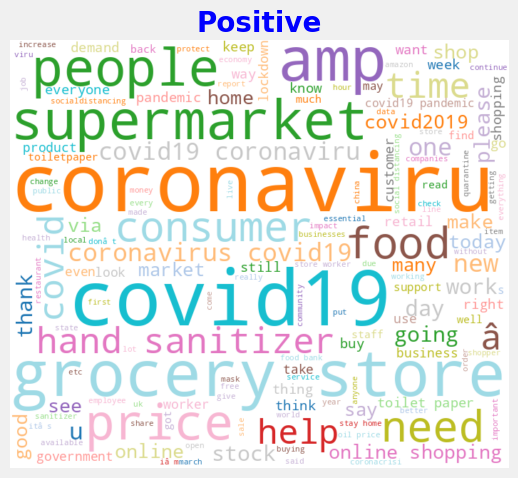

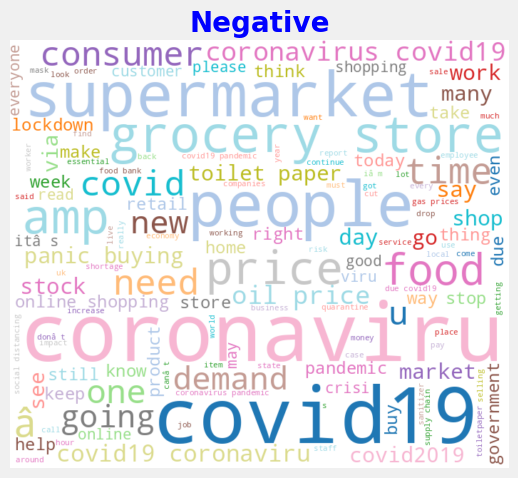

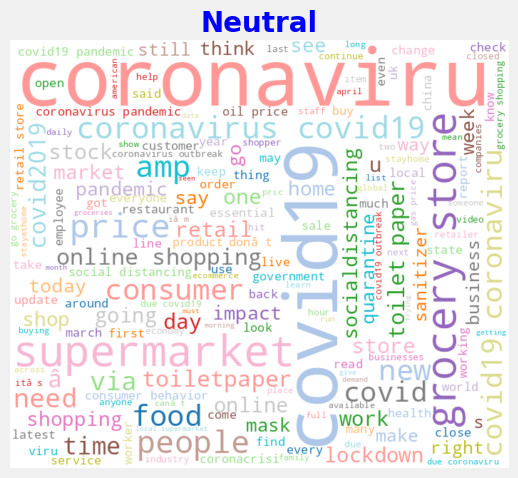

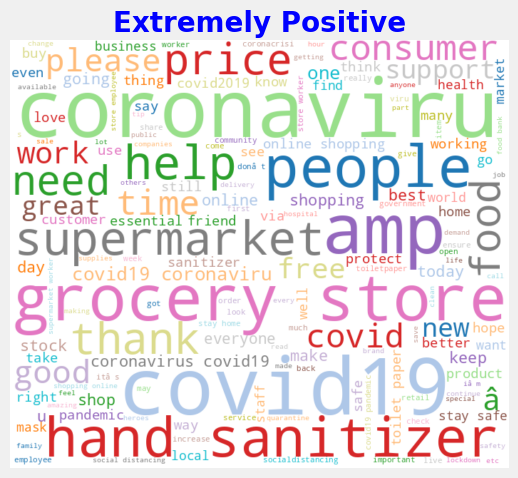

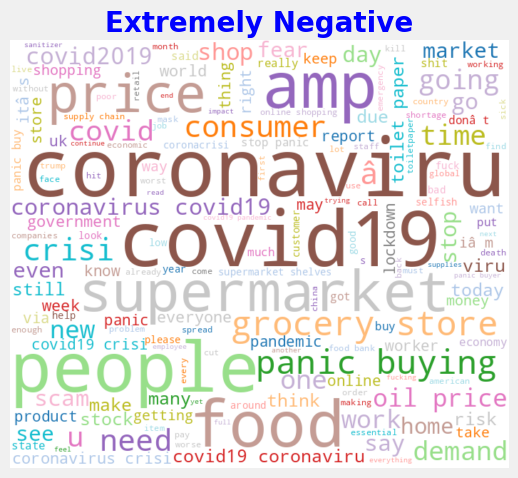

In [87]:
from wordcloud import WordCloud
custom_colormap = 'tab20'
wc = WordCloud(width=700, height=600, min_font_size=10, background_color='white', colormap=custom_colormap)

sentiment_list = ['Positive', 'Negative', 'Neutral', 'Extremely Positive', 'Extremely Negative']

for i in sentiment_list:
    sentiment_tweet = data[data['Sentiment'] == i]['originaltweet'].str.cat(sep=" ")
    wordcloud = wc.generate(sentiment_tweet)

    plt.figure(figsize=(10, 5))
    plt.title(i, fontsize=20, color='Blue', fontweight='bold')  # Adjusting title color here
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout()

plt.show()

* In all types of sentiment, the words like Coronavirus, people, supermarket, grocery store, covid 19, food etc. are extensively used in the tweets.

* Words like hand sanitizer, thank you, price are most used in tweets with
positive sentiment
* Words like panic, toilet paper, covid related words are most used in tweets with negative setniment.

### Applying Label Encoding

#### What all categorical encoding techniques have you used & why did you use those techniques?

In [88]:
new_df= data[['originaltweet','Sentiment']]

In [89]:
## 3 class Classification
new_df["Sentiment"]= new_df["Sentiment"].replace('Positive',3)
new_df["Sentiment"]= new_df["Sentiment"].replace('Extremely Positive',3)
new_df["Sentiment"]= new_df["Sentiment"].replace('Neutral',2)
new_df["Sentiment"]= new_df["Sentiment"].replace('Negative',1)
new_df["Sentiment"]= new_df["Sentiment"].replace('Extremely Negative',1)

# We have encoded our 5 categorical classes of target variable into 3, in order to perform the multiclass classification

#### Text Vectorization

In [90]:
x = new_df['originaltweet']


In [91]:
#TfidVectorizer 3 class

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words= 'english')

X = vectorizer.fit_transform(x)


In [92]:
y = new_df['Sentiment']

#### Which text vectorization technique have you used and why?

Here we have used TF-IDF (term frequency-inverse document frequency) which is a numerical statistic that is used to reflect the importance of a word within a document.

TF-IDF is a powerful technique for extracting features from text data and can be used to improve the performance of a wide range of natural language processing and text mining tasks.

Here are a few reasons why we use TF-IDF:

1. It is able to down-weight the importance of commonly used words, such as "the" and "is," which are known as stop words. This can lead to better-performing models, as these words don't contain much information.

2. It is able to weight words based on their rarity across all documents. So, words that appear in many documents will have a lower weight than words that appear in only a few. This can be useful for identifying important keywords that are unique to a particular document.

3. It gives greater weight to words that appear more often in a document, but not in many documents. This can be useful for identifying important keywords that are unique to a particular document.

4. It performs much better than the Bag of words approach in text classification and clustering.


### Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

In [93]:
new_df['Sentiment'].value_counts()

3    18046
1    15398
2     7713
Name: Sentiment, dtype: int64

Yes, the dataset is imbalanced because of the lesser number of values present in class 2.

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

In [94]:
#import library for 3 class classification

from imblearn.over_sampling import SMOTE

# transform the dataset
oversample = SMOTE()

X_smote, Y_smote = oversample.fit_resample(X, y)


We have used SMOTE to handle our imbalanced dataset. It is an algorithm used to balance class distributions in a dataset. In machine learning, it is often the case that a dataset is imbalanced, meaning that one class of data points occurs much more frequently than the other(s).


We have used SMOTE because of the following reasons:

1. It increases the minority class without creating duplicates.
2. It can balance the class distribution by either over-sampling the minority class or under-sampling the majority class.
3. It can be used to prevent overfitting on imbalanced datasets.



##### Which all features you found important and why?

OriginalTweet and Sentiment are our main features which have been already assigned in X and y

### Data Splitting

In [95]:
# Split your data to train and test. Choose Splitting ratio wisely.
# creating the training and validation set
X_train, X_test, y_train, y_test = train_test_split(X_smote, Y_smote, test_size=.25, random_state=42)

##### What data splitting ratio have you used and why?

We have splitted our data into 75-25 ratio, where 75% of the observations will go into training dataset and 25% of the observations will go into testing data.

## **ML Model Implementation**

### 1. Applying Logistic Regression

#### Explaining the ML Model used and it's performance using Evaluation metric Score Chart.

In [97]:
# classification Ml models
logreg_multiclass = LogisticRegression()

In [98]:
# Fitting the logistic regression model
logreg_multiclass.fit(X_train, y_train)

LogisticRegression()

In [99]:
# Calculating accuracy on test data
y_pred = logreg_multiclass.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy score of the  = ', accuracy)

Accuracy score of the  =  0.8059106021425932


In [100]:
# Printing evaluation metric score chart
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           1       0.77      0.82      0.79      4288
           2       0.89      0.77      0.82      5145
           3       0.76      0.85      0.80      4102

    accuracy                           0.81     13535
   macro avg       0.81      0.81      0.81     13535
weighted avg       0.81      0.81      0.81     13535



<Axes: >

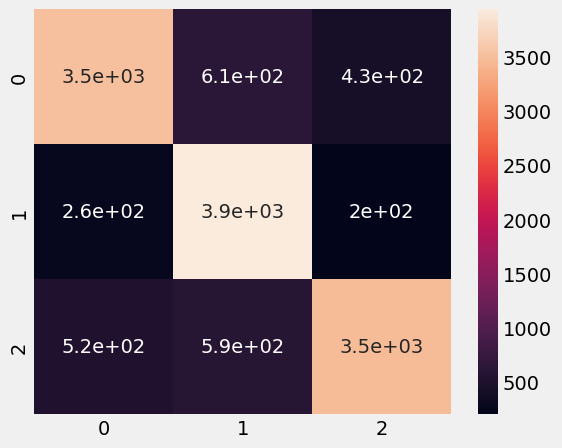

In [101]:
## Plotting confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

#### Cross- Validation & Hyperparameter Tuning

In [102]:
#ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV)
parameters = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}

In [103]:
grid_search_lg = GridSearchCV(logreg_multiclass, parameters, cv=5)

In [104]:
# Fitting grid search on logistic regression
grid_search_lg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']})

In [105]:
#Best parameters after applying gridsearch cv
print("Best parameters: ", grid_search_lg.best_params_)

Best parameters:  {'C': 10, 'penalty': 'l2'}


In [106]:
y_pred = grid_search_lg.predict(X_test)

In [107]:
## Printing the accuracy after applying cross validation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.8313261913557444


In [108]:
## Classification report after applying gridsearch cross validation technique
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           1       0.81      0.84      0.82      4379
           2       0.91      0.81      0.85      4965
           3       0.78      0.86      0.82      4191

    accuracy                           0.83     13535
   macro avg       0.83      0.83      0.83     13535
weighted avg       0.84      0.83      0.83     13535



<Axes: >

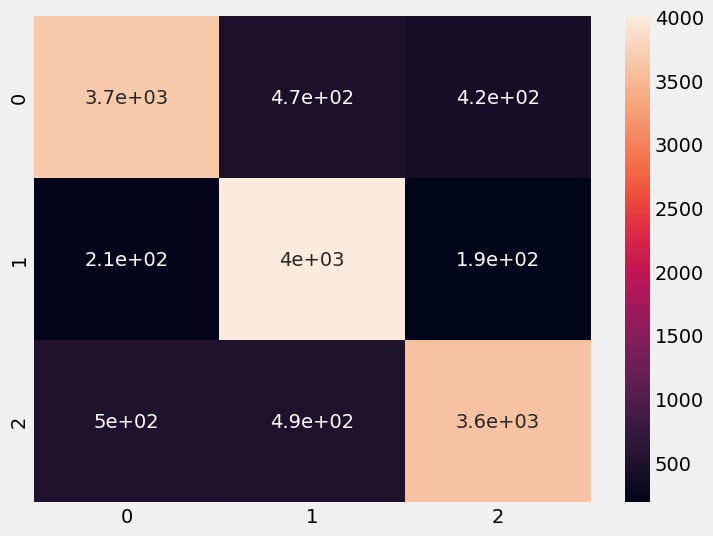

In [109]:
## Plotting confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

##### Which hyperparameter optimization technique have you used and why?

We have used Gridsearch cross validation to find the optimal set of hyperparameters for a machine learning model.

The GridSearchCV method performs an exhaustive search over a specified parameter grid, evaluating the model performance for each combination of parameters using cross-validation.

We use GridSearchCV because of the following reasons:

1. It saves time and effort by automating the process of tuning the hyperparameters, instead of trying different combinations of parameters manually.

2. It provides the best combination of hyperparameters that can maximize the model's performance.

3. It helps to prevent overfitting by evaluating the model's performance on different data subsets.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there is an improvement in our model, our accuracy on test data got increased to 83%, while earlier it was 81%

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

There are several evaluation metrics that we used to evaluate the performance of our logistic regression model for sentiment prediction on COVID-19 tweets.

1. **Accuracy**: This metric measures the proportion of correctly classified samples out of all samples. It indicates how well the model is able to predict the correct sentiment for tweets.

2. **Precision**: Precision is the proportion of true positive predictions out of all positive predictions. It indicates how many of the tweets the model predicted as positive are actually positive. High precision means that the model is not giving many false positives.

3. **Recall**: Recall is the proportion of true positive predictions out of all actual positive samples. It indicates how many of the actual positive tweets the model is able to predict. High recall means that the model is not missing many actual positive tweets.

4. **F1-score**: The F1-score is a harmonic mean of precision and recall, and it is used to balance the trade-off between precision and recall.

Overall, a high accuracy which is 83% here, precision and recall, and F1-score which are all above 80% in this case would indicate that the model is performing well and it is able to predict the sentiment of the tweets accurately. This would have a positive impact on the business as it can be used to monitor the public opinion and sentiment towards the COVID-19 pandemic and take necessary actions accordingly.

### 2. SVC Classifier

In [110]:
# Visualizing evaluation Metric Score chart
svc_clf = SVC(kernel='linear', C=1)


In [111]:
svc_clf.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [112]:
# Calculating accuracy on test data
y_pred = svc_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy score of the  = ', accuracy)

Accuracy score of the  =  0.8270410048023642


#### Cross- Validation & Hyperparameter Tuning

In [113]:
param_grid = {'C': [1, 10], 'kernel': ['linear', 'rbf']}

In [114]:
grid_search_svc = RandomizedSearchCV(estimator=svc_clf, param_distributions =param_grid, cv=3, verbose = 10, n_jobs = 1)
grid_search_svc.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3; 1/4] START C=1, kernel=linear..........................................
[CV 1/3; 1/4] END ...........C=1, kernel=linear;, score=0.805 total time= 4.1min
[CV 2/3; 1/4] START C=1, kernel=linear..........................................
[CV 2/3; 1/4] END ...........C=1, kernel=linear;, score=0.802 total time= 4.2min
[CV 3/3; 1/4] START C=1, kernel=linear..........................................
[CV 3/3; 1/4] END ...........C=1, kernel=linear;, score=0.797 total time= 3.9min
[CV 1/3; 2/4] START C=1, kernel=rbf.............................................
[CV 1/3; 2/4] END ..............C=1, kernel=rbf;, score=0.797 total time= 6.2min
[CV 2/3; 2/4] START C=1, kernel=rbf.............................................
[CV 2/3; 2/4] END ..............C=1, kernel=rbf;, score=0.797 total time= 6.2min
[CV 3/3; 2/4] START C=1, kernel=rbf.............................................
[CV 3/3; 2/4] END ..............C=1, kernel=rbf;,

RandomizedSearchCV(cv=3, estimator=SVC(C=1, kernel='linear'), n_jobs=1,
                   param_distributions={'C': [1, 10],
                                        'kernel': ['linear', 'rbf']},
                   verbose=10)

In [115]:
print("Best hyperparameters: ", grid_search_svc.best_params_)

Best hyperparameters:  {'kernel': 'rbf', 'C': 10}


In [116]:
y_pred_svc = grid_search_svc.predict(X_test)

In [117]:
accuracy = accuracy_score(y_test, y_pred_svc)
print("Accuracy: ", accuracy)

Accuracy:  0.8489841152567418


##### Which hyperparameter optimization technique have you used and why?

We have used Gridsearch cross validation to find the optimal set of hyperparameters for a machine learning model.

The GridSearchCV method performs an exhaustive search over a specified parameter grid, evaluating the model performance for each combination of parameters using cross-validation.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

We were not able to check any improvement there as it was taking so much time to run. We tried running it for 2 hours and even more than that, but still no output was there.

In [118]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           1       0.83      0.83      0.83      4548
           2       0.89      0.87      0.88      4405
           3       0.82      0.84      0.83      4582

    accuracy                           0.85     13535
   macro avg       0.85      0.85      0.85     13535
weighted avg       0.85      0.85      0.85     13535



<Axes: >

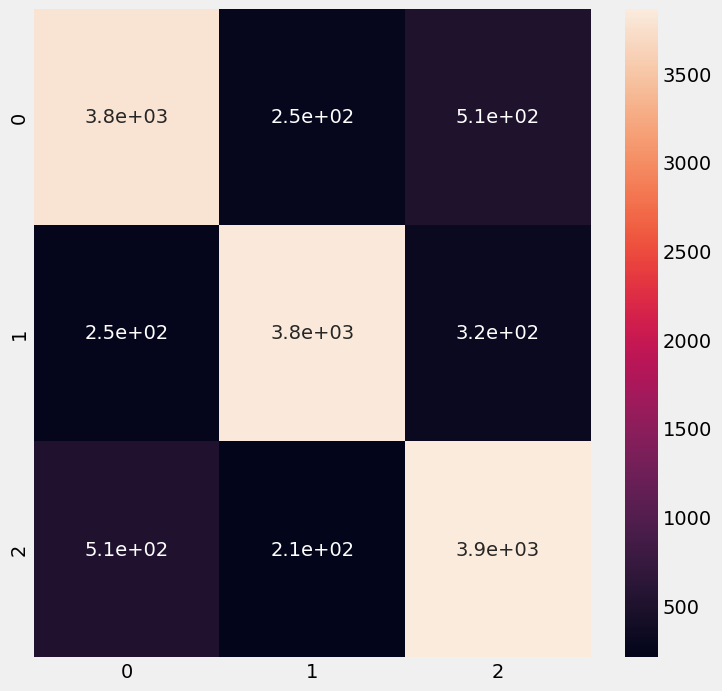

In [119]:
## Plotting confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test, y_pred_svc), annot=True)

Here we got testing accuracy of 83%, which means that business can predict sentiment with 83% accuracy. And here, in this Support vector Classifier model, precision, recall and f1 score are all nearly equal to and more than 80%.

There are several evaluation metrics that we used to evaluate the performance of our logistic regression model for sentiment prediction on COVID-19 tweets.

1. Accuracy: This metric measures the proportion of correctly classified samples out of all samples. It indicates how well the model is able to predict the correct sentiment for tweets.

2. Precision: Precision is the proportion of true positive predictions out of all positive predictions. It indicates how many of the tweets the model predicted as positive are actually positive. High precision means that the model is not giving many false positives.

3. Recall: Recall is the proportion of true positive predictions out of all actual positive samples. It indicates how many of the actual positive tweets the model is able to predict. High recall means that the model is not missing many actual positive tweets.

4. F1-score: The F1-score is a harmonic mean of precision and recall, and it is used to balance the trade-off between precision and recall.

### 3. SGD Classifier

#### Explaining the ML Model used and it's performance using Evaluation metric Score Chart.

In [120]:
from sklearn.linear_model import SGDClassifier

In [121]:
sgd_clf = SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, random_state=42)


In [122]:
## Fitting the algorithm
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [123]:
## Prediciting results and calculating accuracy
sgd_prediction = sgd_clf.predict(X_test)
sgd_train_accuracy = sgd_clf.score(X_train,y_train)
sgd_accuracy = accuracy_score(y_test,sgd_prediction)
print("training accuracy Score    : ",sgd_train_accuracy)
print("testing accuracy Score : ",sgd_accuracy )

training accuracy Score    :  0.8474989532793143
testing accuracy Score :  0.7811599556704839


In [124]:
# Visualizing evaluation Metric Score chart
print(classification_report(sgd_prediction,y_test))

              precision    recall  f1-score   support

           1       0.73      0.82      0.77      4044
           2       0.90      0.72      0.80      5533
           3       0.72      0.84      0.77      3958

    accuracy                           0.78     13535
   macro avg       0.78      0.79      0.78     13535
weighted avg       0.80      0.78      0.78     13535



#### Cross- Validation & Hyperparameter Tuning

In [125]:
## Defining the grid for the parameters
param_grid = {
    'loss': ['hinge', 'log', 'modified_huber'],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'optimal', 'invscaling']
}


In [126]:

grid_search = GridSearchCV(sgd_clf, param_grid, cv=5)

In [127]:
# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SGDClassifier(random_state=42),
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'learning_rate': ['constant', 'optimal', 'invscaling'],
                         'loss': ['hinge', 'log', 'modified_huber'],
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [128]:
## Calculating predictions and accuracy after applying grid search on sgd
sgd_grid_prediction = grid_search.predict(X_test)
sgd_grid_train_accuracy = grid_search.score(X_train,y_train)
sgd_grid_accuracy = accuracy_score(y_test,sgd_grid_prediction)
print("training accuracy Score    : ",sgd_grid_train_accuracy)
print("testing accuracy Score : ",sgd_grid_accuracy )

training accuracy Score    :  0.8534098465630618
testing accuracy Score :  0.8186183967491688


In [129]:
## Classification Report
print(classification_report(sgd_grid_prediction, y_test))

              precision    recall  f1-score   support

           1       0.77      0.84      0.80      4196
           2       0.90      0.78      0.83      5117
           3       0.79      0.85      0.82      4222

    accuracy                           0.82     13535
   macro avg       0.82      0.82      0.82     13535
weighted avg       0.82      0.82      0.82     13535



<Axes: >

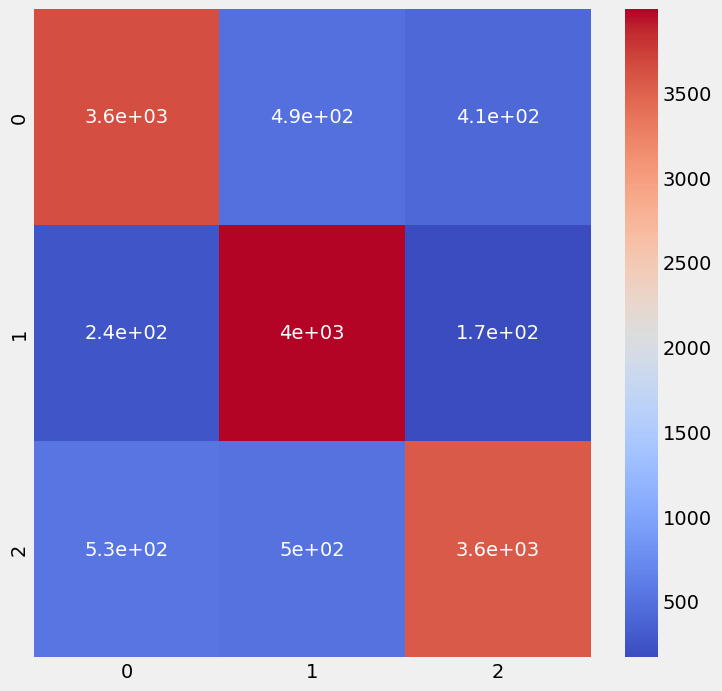

In [130]:
## Plotting confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm')

After applying grid search on sgd classifier, we got accuracy of 82% which is good because grid search has increased the accuracy of our Stochastic Gradient Descent classifier(SGD) by hyperparameter optimization.

### **Comparing Different Models**

In [131]:

# Instantiate  models
models = [
          ['NaiveByes_clf: ',MultinomialNB()],
          ['SGD_clf: ', SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=42)],
          ['RandomForest_clf: ', RandomForestClassifier(random_state=42)],
          ['SupportVector_clf: ', SVC()],
          ['Logistic_clf: ', LogisticRegression()]
]


In [132]:
# Run all the proposed models and update the information in a list model_data
import time
from math import sqrt
from sklearn import metrics

model_data = []
for name,model in models :

    model_data_dic = {}
    model_data_dic["Name"] = name
    start = time.time()
    end = time.time()
    model.fit(X_train,y_train)
    model_data_dic["Train_Time"] = end - start
    # Training set
    model_data_dic["Train_Accuracy"] = metrics.accuracy_score(y_train, model.predict(X_train))
    # Validation set
    model_data_dic["Test_Accuracy"] = metrics.accuracy_score(y_test, model.predict(X_test))

    model_data.append(model_data_dic)


In [133]:

# Convert list to dataframe
df = pd.DataFrame(model_data)
print(df)

                  Name    Train_Time  Train_Accuracy  Test_Accuracy
0      NaiveByes_clf:   4.768372e-07        0.822181       0.714740
1            SGD_clf:   4.768372e-07        0.847499       0.781160
2   RandomForest_clf:   7.152557e-07        0.999803       0.773550
3  SupportVector_clf:   2.384186e-07        0.986454       0.828371
4       Logistic_clf:   2.384186e-07        0.902150       0.805911


In [134]:
sorted_models= df.sort_values(by='Test_Accuracy', ascending=False)
sorted_models

,Name,Train_Time,Train_Accuracy,Test_Accuracy
3,SupportVector_clf:,2.384186e-07,0.986454,0.828371
4,Logistic_clf:,2.384186e-07,0.902150,0.805911
1,SGD_clf:,4.768372e-07,0.847499,0.781160
2,RandomForest_clf:,7.152557e-07,0.999803,0.773550
0,NaiveByes_clf:,4.768372e-07,0.822181,0.714740


<Axes: xlabel='Test_Accuracy', ylabel='Name'>

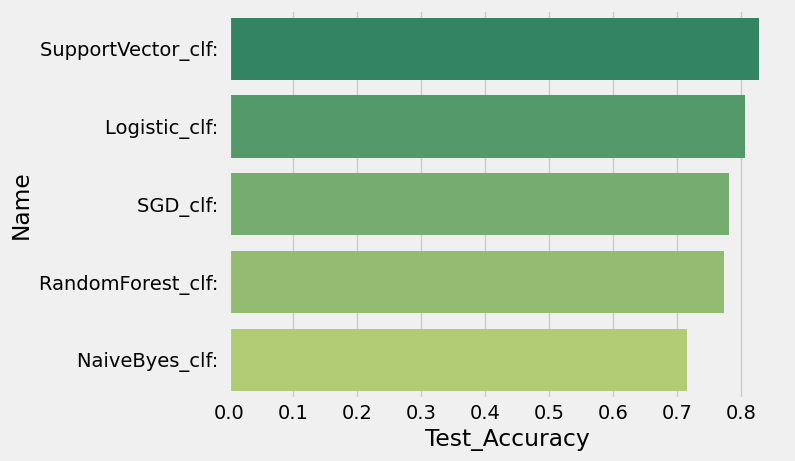

In [135]:
sns.barplot(data=sorted_models, x='Test_Accuracy', y='Name')

Support Vector Classifier gives us the best test accuracy, i.e. = 82.8%

### Which ML model did you choose from the above created models as your final prediction model and why?

Our Final ML Model is Support Vector Classifier, which gives the accuracy of 83% on test data.

### **Saving the model in Pickle file**

In [136]:
# Save the File
import pickle

# Save the model to a file
with open('svc_clf.pkl', 'wb') as file:
    pickle.dump(svc_clf, file)

In [137]:
# Load the model from the file
with open('svc_clf.pkl', 'rb') as file:
    svc_clf = pickle.load(file)

### **Challenges Faced**

* Lot of time is required to run grid search cv on support vector classifier.
* While running complex algorithms and models colab was crashing sometimes, and we had to restart running all the cells from beginning.
* As Data is related to natural language processing sentiment analysis, Time required for data pre processing is high.
* As it was textual data, it took time to understand different features in our dataset.
* Out of so many available machine learning algorithms it took lot of experimentation to decide the best model to predict the sentiment.

# **Conclusion**

In this project we have data related to covid-19 tweets, where we have done exploratory data analysis, applied multiple text preproicessing techniques, vectorisation of textual data and we have also handled the imbalance in our dataset. And finally we build multiple machine learning models, where Support Vector Classifier was the best model because it gives the highest accuracy on test data as compared to other models.

                                                   Some of the key insights found from this project are as follows👇🏻-:

* Most of the tweets found were in March and April 2020, as the first wave of covid spread widely around the world and many countries declared lockdowns.

* Majority of the sentiments are positive as people try to keep a brave face during the pandemic.

* Username and ScreenName were not important for our analysis because they contained all unique IDs

* Majority of the tweets came from the US, UK, and India as these were the most affected geographies.

* Most of the hashtags used in tweets will be either #COVID19 or #coronavirus.

* Food and coronavirus, covid 19 should be some of the most common words because there was a shortage of food in grocery stores during the pandemic.

* We extracted new features like num_char, num_words, num_sentences to check the sentiment of a tweet. We saw that if there are more words, characters and sentences, then the sentiment of the tweet is more positive. Tweets with neutral sentiment contain fewer words, characters, and sentences.

* If the performance of the multiclass models was not satisfactory, we would convert the problem to a binary class where the target variable could be changed to (0 and 1)

* For vectorization, we tried TF-IDF vectorization for vectorization and used an unbalanced method using smote over_sampling to balance the data because most of the tweets were positive.

* The feature importance is calculated based on the most frequent words in each class. We can see that London, United States, New York, Washington DC, United Kingdom, India, Australia, USA are the places in terms of the number of tweets.

* We can see that the maximum number of tweets was made on March 20, 2020, when the first lockdown was announced. People were more active on Twitter in March because it was the early stage of the coronavirus pandemic and people wanted to know more about the disease.

* We evaluated the multi-class models as categories – positive, neutral, and negative.

* We have applied multiple classification machine learning models where Support Vector Classifier is the one with best accuracy on testing Data.

* And at last we saved our SVC model into a pickle file for further process of deployment.

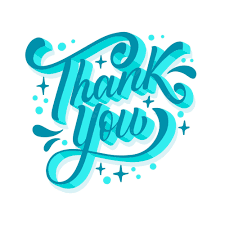